In [ ]:
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [ ]:
import cvxpy as cp
import numpy as np
import osqp
# import dccp

C = np.load('/content/drive/MyDrive/mfds/Data For Assignment/C.npy').astype(np.float64)
y = np.load('/content/drive/MyDrive/mfds/Data For Assignment/y.npy').astype(np.int64)
y = np.squeeze(y)
A_inv = np.load('/content/drive/MyDrive/mfds/Data For Assignment/A_inv.npy').astype(np.float64)
C.shape, y.shape, A_inv.shape

((479, 1595), (479,), (1595, 1595))

In [ ]:
s = cp.Variable(C.shape[1])
print(s.shape)
# np.linalg.norm(s)#, ord = 1)sum(abs(s)),[y == C@s])#
prob = cp.Problem(cp.Minimize(cp.norm(s,1)),[y == C@s])#,[cp.norm(y - C@s, 2) == 0])
# dccp.is_dccp(prob)
result = prob.solve(solver=cp.OSQP)
print(s.value)

(1595,)
[ 7.79053490e+02 -1.00801193e+02 -7.43254272e+02 ...  4.53813097e-03
  4.99444647e-03 -1.04948874e-02]


In [ ]:
np.save('/content/drive/MyDrive/mfds/Data For Assignment/s.npy', s.value)

In [ ]:
# type(s)
# a = s.value
# type(a)
s.value = 
C.dtype

dtype('float64')

In [ ]:
# A_inv = A_inv.astype(float64)
# A = np.linalg.inv(A_inv)
x = A_inv@s.value
# A.shape

In [ ]:
np.save('/content/drive/MyDrive/mfds/x',x)

(29, 55, 3)


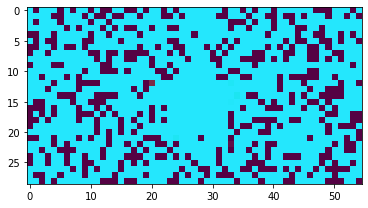

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = np.array(cv2.imread('/content/drive/MyDrive/mfds/Data For Assignment/incomplete1.png'))
print(img.shape)
plt.imshow(img)

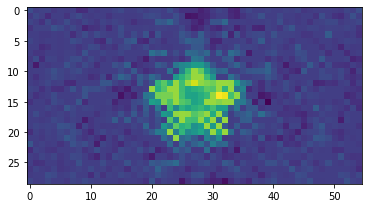

In [ ]:
# a = np.array(s)
# type(a), a.shape
plt.imshow(x.reshape(img.shape[1],img.shape[0]).T)

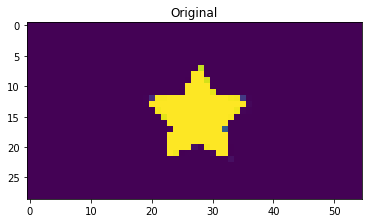

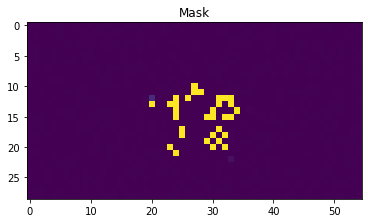

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import imageio
#%% Discrete Cosine Transform 
def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

#%% VARIABLES FOR YOU TO CHANGE
path_to_your_image="/content/drive/MyDrive/mfds/star_b.jpg"
zoom_out=0.05999999 #Fraction of the image you want to keep.
corruption=0.7#Fraction of the pixels that you want to discard
#%% Get image and create y
# read original image and downsize for speed
Xorig =imageio.imread(path_to_your_image, pilmode='L') # read in grayscale
#Downsize image 
X = spimg.zoom(Xorig, zoom_out)
ny,nx = X.shape

# extract small sample of signal
corruption=1-corruption
k = round(nx * ny * corruption) 
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
b = X.T.flat[ri]
b = np.expand_dims(b, axis=1)
#%% CREATE A inverse and C
# *******************************************************************************************
"""This part consumes a lot of memory. Your PC might crash if the images you load are larger than 100 x 100 pixels """
# create dct matrix operator using kron (memory errors for large ny*nx)
Aa = np.kron(
    np.float16(spfft.idct(np.identity(nx), norm='ortho', axis=0)),
    np.float16(spfft.idct(np.identity(ny), norm='ortho', axis=0))
    )
A = Aa[ri,:] # same as B times A
# *******************************************************************************************
# create images of mask (for visualization)
mask = np.zeros(X.shape)
mask.T.flat[ri] = True
mask[mask==0]=False
masked=X*mask
Xm = 255 * np.ones(X.shape)
Xm.T.flat[ri] = X.T.flat[ri]
#%%
plt.imshow(X)
plt.title("Original")
plt.show()

plt.imshow(masked)
plt.title("Mask")
plt.show()
#%% SAVE MATRICES TO DRIVE
import os
dir_name="Data For Assignment"
try:
    os.mkdir(dir_name)
except Exception as e:
    pass

np.save(dir_name+'/C',A)
np.save(dir_name+'/A_inv',Aa)
np.save(dir_name+'/y',b)
plt.imsave(dir_name+'/incomplete1.png',Xm)
plt.imsave(dir_name+'/original_with_crop.png',X)

In [ ]:
import os

os.chdir('/content/drive/MyDrive/mfds')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/mfds'

In [ ]:
! rm -r Data\ For\ Assignment